# Gene Regulation III - Lecture
## *aka* Gene Regulatory Network (GRN)
### & *aka* What your data is really telling you
UMass Chan GSBS BBS764

*Lingfei Wang*

2025-02-28

## Mechanisms of gene regulation
* Transcription factor (TF) binding to DNA
* DNA methylation
* Histone modification
* MicroRNA & other post-transcriptional regulations
* Post-translational regulation
* And many more...
* Forming a gene regulatory <font color='red'>network (GRN)</font>


## Table of contents
* Network - What
* Gene regulatory network - What & why
* Gene regulatory network - Theoretically how: the good, the bad, and the ugly
* Gene regulatory network - Practically how
* Gene regulatory network analysis

## Network - What
| Artificial neural network | Internet | Traffic network | 
| :-----------------: | :-----------------: | :-----------------: |
| <img src="https://s7280.pcdn.co/wp-content/uploads/2020/07/Two-or-more-hidden-layers-comprise-a-Deep-Neural-Network.png" width="200"/>| <img src="https://www.cloudwards.net/wp-content/uploads/2018/06/IoT-1.png" width="200"/> | <img src="https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201212/20121219155533-0_0.jpg" width="200"/>|
| **PPI network** | **Phylogenetic tree** | **Social network** |
| <img src="https://www.researchgate.net/publication/344673028/figure/fig3/AS:946938149097473@1602779056277/Protein-protein-interaction-PPI-network-of-the-AD-The-nodes-indicate-the-proteins-and.png" width="150"/> | <img src="https://cdn.britannica.com/00/110900-004-603B2A4F/family-tree-animal-kingdom.jpg" width="200"/> | <img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Moreno_Sociogram_2nd_Grade.png" width="200"/> |

## Network - Example
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Moreno_Sociogram_2nd_Grade.png" style="float:right;" width="250"/>

* Network/graph: collection of nodes and edges
* Nodes: entities
* Node properties: name, gender, age, etc
* Edges: relationships between nodes
* Edge properties
    * Type: like, fight, went to birthday party, etc
    * Other properties: direction (or not), strength, frequency, etc


## Network - Exercise
Choose a network and define its nodes, edges, and their properties.
| Artificial neural network | Internet | Traffic network | 
| :-----------------: | :-----------------: | :-----------------: |
| <img src="https://s7280.pcdn.co/wp-content/uploads/2020/07/Two-or-more-hidden-layers-comprise-a-Deep-Neural-Network.png" width="200"/>| <img src="https://www.cloudwards.net/wp-content/uploads/2018/06/IoT-1.png" width="200"/> | <img src="https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201212/20121219155533-0_0.jpg" width="200"/>|
| **PPI network** | **Phylogenetic tree** | ***Your own network*** |
| <img src="https://www.researchgate.net/publication/344673028/figure/fig3/AS:946938149097473@1602779056277/Protein-protein-interaction-PPI-network-of-the-AD-The-nodes-indicate-the-proteins-and.png" width="150"/> | <img src="https://cdn.britannica.com/00/110900-004-603B2A4F/family-tree-animal-kingdom.jpg" width="200"/> | <img src="https://static.vecteezy.com/system/resources/thumbnails/000/130/805/small/nanotechnology-virtual-abstract-background.jpg" width="200"/> |


## Gene regulatory network - "What" in simplest form
* Nodes: genes
* Node properties: name
* Edges: gene relationships
* Edge properties
	* Type: gene regulation - one gene's expression level depends on another, either directly or through other genes
	* Direction: which is regulator and which is target
	* Regulation strength (optional)
* Disclaimers
	* Not TF binding network: other mechanisms and inactive binding
	* Not co-expression network
	* Not static: context specific and dynamically rewired

## Gene regulatory network - Why
* Understanding individual genes

| Social network | Gene regulatory network | 
| :-----------------: | :-----------------: |
| <img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Moreno_Sociogram_2nd_Grade.png" width="140"/> | <img src="img/bio.jpg" width="400" onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/grnlab/courses/refs/heads/master/2025_BBS764/img/bio.jpg';"/>|

* Understanding system behavior
	* Cell homeostasis, response, fate, and interaction with environment and other cells
	* Organismal response to pathogens or other environmental changes
	* Disease mechanism and susceptibility

* Informing interventional applications
	* Predicting perturbation outcome
	* Directing cells to a certain state or fate
	* Developing (personalized) therapeutics


## Gene regulatory network - Status
* **Reconstruct** -> analyze
* Ancient field: ChIP microarray on yeast over 20 years ago
* Hard problem: still low accuracy today
* Limited knowledge: not static
* Opportunity from single cell and spatial technologies: data volume, resolution, and modality


## The Bad - Illustration
We often find two genes in data go up and down together. Does that mean one regulates the other?


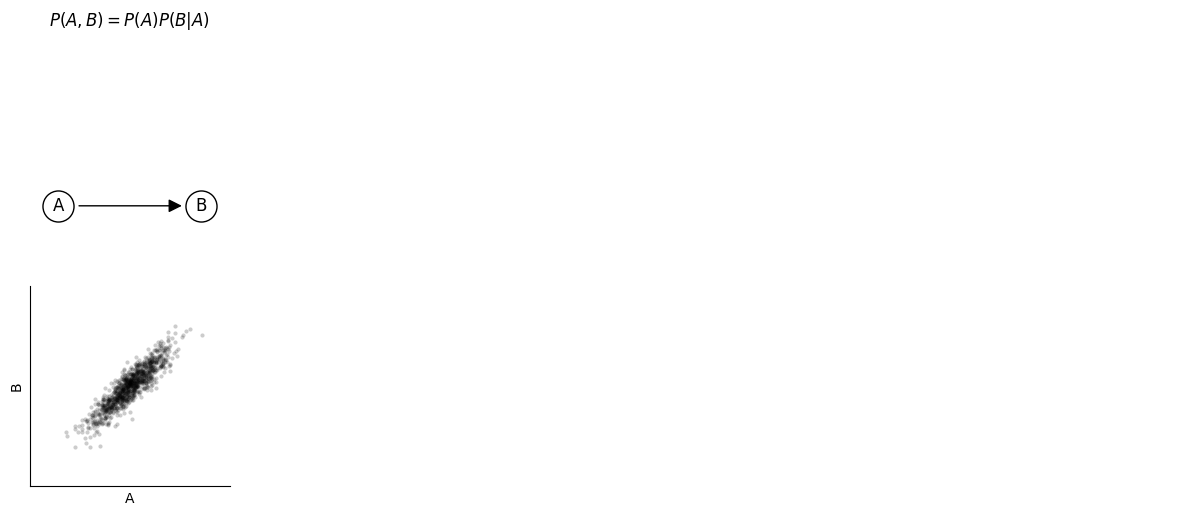

In [20]:
%run lib.py
opts={'node_x':[0,1,0.5],'node_y':[0,0,0.86]}
nets=[
	[('A->B',{}),('A-|B',{}),('A B',{})],
	[('A<-B',{}),('A->c->B',opts),('A-|c-|B',opts),('A<-c->B',{'node_x':[0,1,0.5],'node_y':[0,0,0.86],'default_weight':2.828}),('A->c<-B',opts)]
]
np.random.seed(123)
display(Markdown('''
## The Bad - Illustration
We often find two genes in data go up and down together. Does that mean one regulates the other?
'''))
fig,axes=draw_panel([nets[0][0]],draw_data=[('A','B')])
plt.show()


## The Bad - Illustration
We often find two genes in data go up and down together. Does that mean one regulates the other?


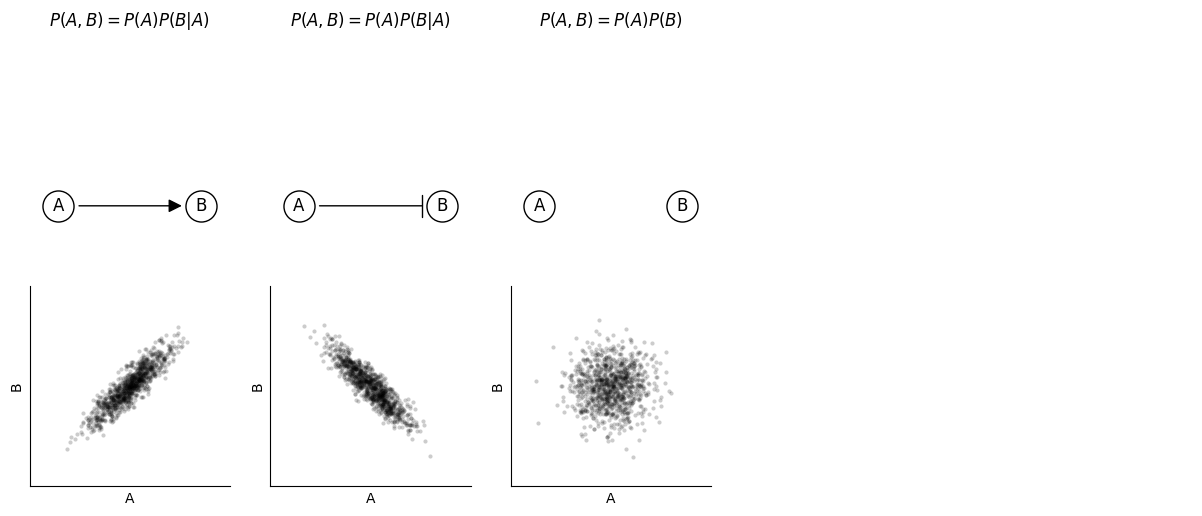

In [21]:
display(Markdown('''
## The Bad - Illustration
We often find two genes in data go up and down together. Does that mean one regulates the other?
'''))
fig,axes=draw_panel(nets[0],draw_data=[('A','B')])
plt.show()


## The Bad - Group exercise
Form a group of 2-3 people. Each person choose 1-2 networks from the following. For each network:
1. Write down the decomposition of distribution
2. Draw a schematic scatter plot for A and B
3. Convince your group members with your answers


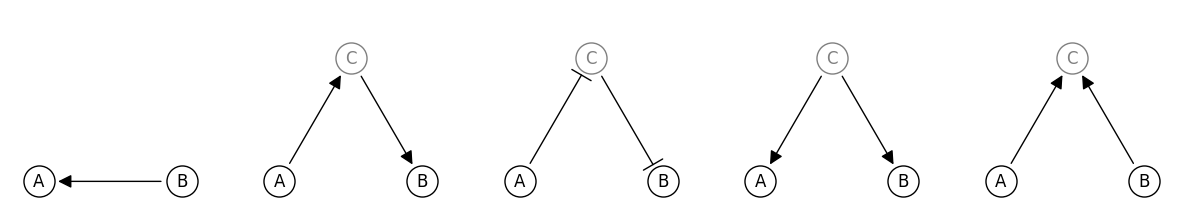


* Gray nodes: unmodelled or unobserved nodes (not finally needed in scatter plot)
* '->' edges: positive regulation/activation
* '-|' edges: negative regulation/repression


In [22]:
s='''
## The Bad - Group exercise
Form a group of 2-3 people. Each person choose 1-2 networks from the following. For each network:
1. Write down the decomposition of distribution
2. Draw a schematic scatter plot for A and B
3. Convince your group members with your answers
'''
display(Markdown(s))
fig,axes=draw_panel(nets[1],draw_distribution=False)
plt.show()
s='''
* Gray nodes: unmodelled or unobserved nodes (not finally needed in scatter plot)
* '->' edges: positive regulation/activation
* '-|' edges: negative regulation/repression
'''
display(Markdown(s))



## The Bad - Solutions


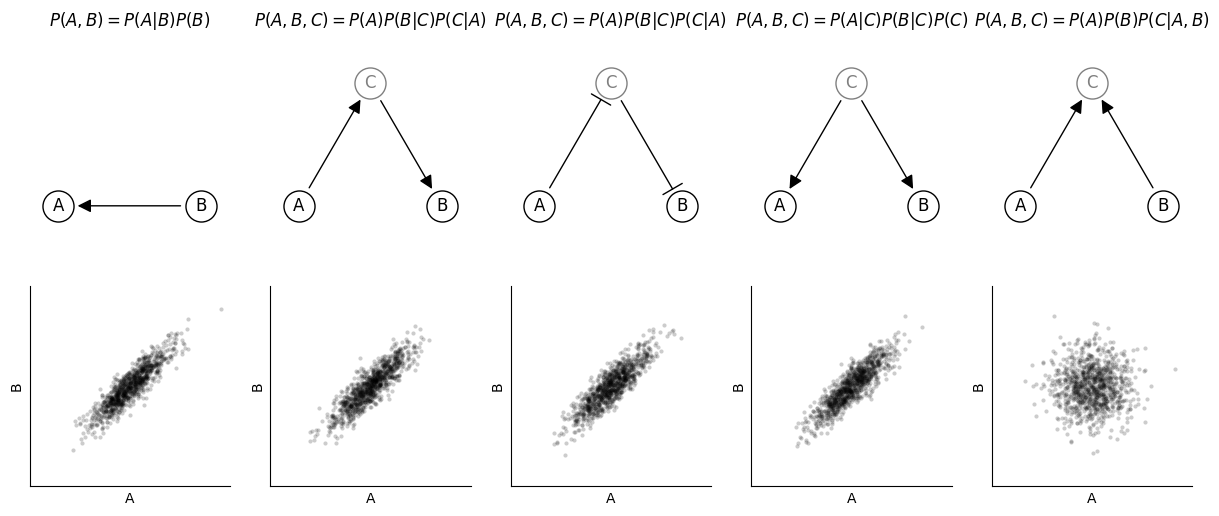

In [23]:
s='''
## The Bad - Solutions
'''
display(Markdown(s))
fig,axes=draw_panel(nets[1],draw_data=[('A','B')])
plt.show()


## The Ugly - Cases with positive correlation


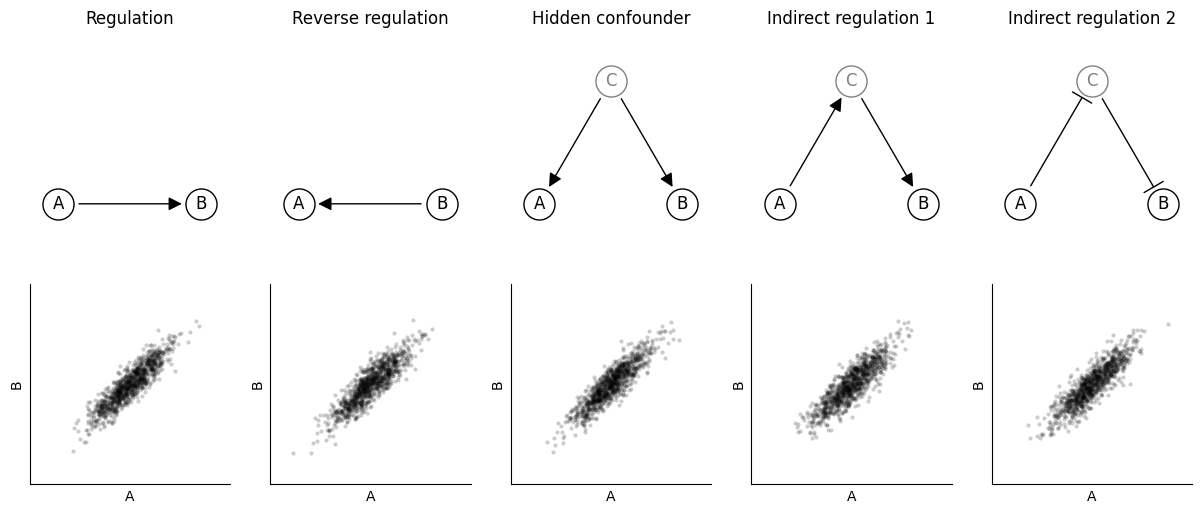

In [24]:
s='''
## The Ugly - Cases with positive correlation
'''
display(Markdown(s))
fig,axes=draw_panel([nets[0][0],nets[1][0],nets[1][-2]]+nets[1][1:-2],draw_data=[('A','B')],draw_distribution=False)
axes[0][0].set_title('Regulation')
axes[0][1].set_title('Reverse regulation')
axes[0][2].set_title('Hidden confounder')
axes[0][3].set_title('Indirect regulation 1')
axes[0][4].set_title('Indirect regulation 2')
plt.show()


## The Ugly - Cases with positive correlation


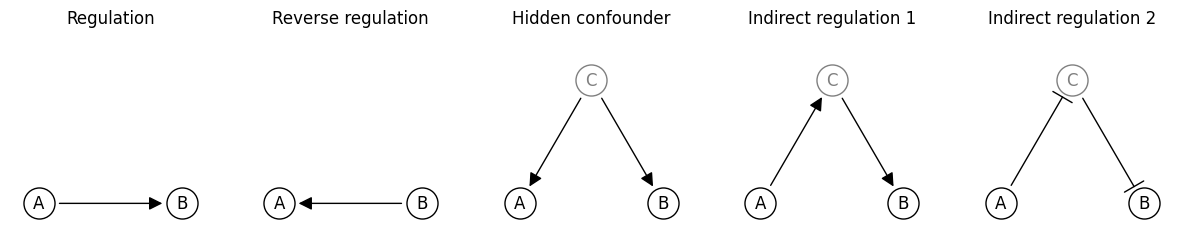

In [28]:
s='''
## The Ugly - Cases with positive correlation
'''
display(Markdown(s))
fig,axes=draw_panel([nets[0][0],nets[1][0],nets[1][-2]]+nets[1][1:-2],draw_distribution=False)
axes[0][0].set_title('Regulation')
axes[0][1].set_title('Reverse regulation')
axes[0][2].set_title('Hidden confounder')
axes[0][3].set_title('Indirect regulation 1')
axes[0][4].set_title('Indirect regulation 2')
plt.show()

1. **Now imagine a stronger constraint. To conclude A->B, we additionally require A to be a TF that binds to a candidate cis-regulatory element (CRE) of B besides the correlation between A and B. Will this approach correctly include/exclude each of the 5 cases above?**

2. **Now consider a different approach. Instead of using correlation, this new approach fits a function $f$ to predict $B$ with $A$ i.e. $B=f(A)$. If we can find a function to fit data well, this approach will conclude A->B. Is this approach better?**

## The Good - Randomized controlled trials
<img src="img/trial.jpg" style="display: block; margin-left: auto; margin-right: auto;" width="400" onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/grnlab/courses/refs/heads/master/2025_BBS764/img/trial.jpg';"/>

Highly mature and successful study design used for drug approval world-wide e.g. FDA.

* Goal: testing whether (E)xposure to a treatment affects the (O)utcome of a disease.
* Trial design
	* (G)roup patients into two <font color='red'>randomly</font> and <font color='green'>double-blindedly</font> 
	* Give one group actual treatment and the other group <font color='green'>placebo</font>
	* Test whether disease outcome differs between two groups

## The Good - Randomized controlled trials
<img src="img/trial.jpg" style="display: block; margin-left: auto; margin-right: auto;" width="400" onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/grnlab/courses/refs/heads/master/2025_BBS764/img/trial.jpg';"/>

In other words:
* Goal: testing E->O
* Design: introduce G->E and test G->O
* Hypothesized relationship: G->E->O

Swapping the alphabet for gene regulatory network:
* Goal: testing A->B
* Design: introduce perturbation P->A and test P->B
* Hypothesized relationship: P->A->B


## The Good - Illustration with continuous perturbation


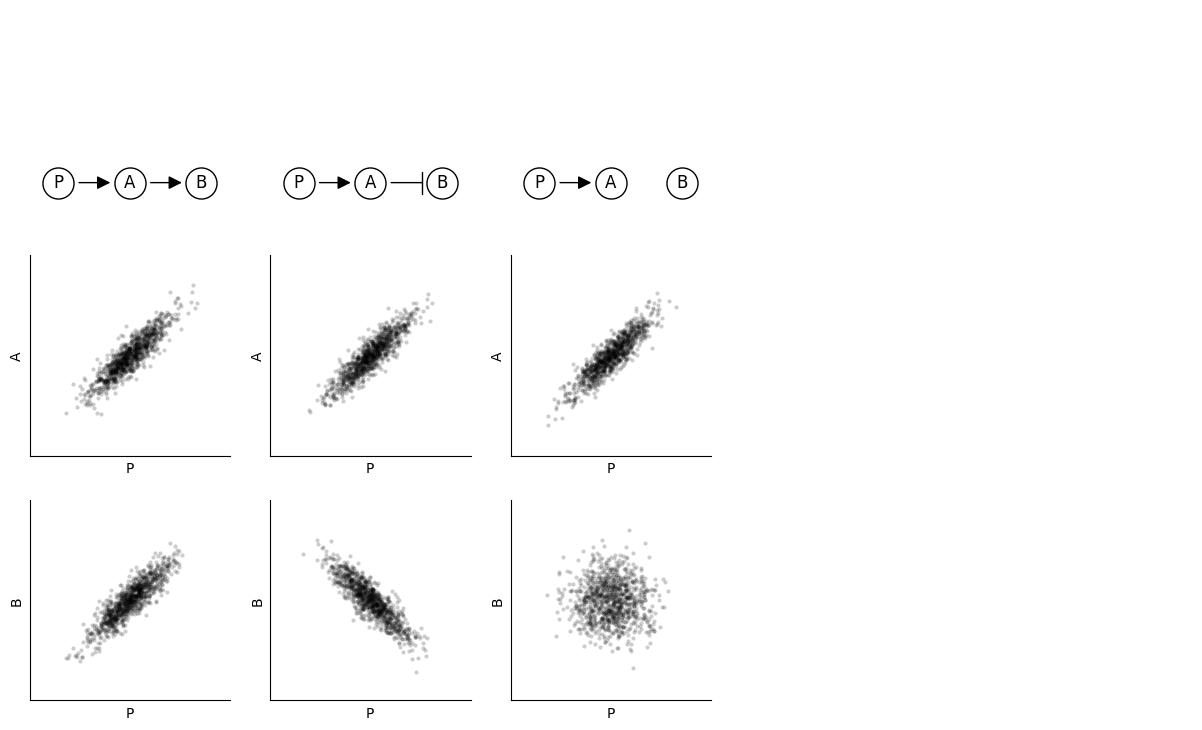

In [6]:
s='''
## The Good - Illustration with continuous perturbation
'''
display(Markdown(s))
opts={'node_x':[0.5,1,0]}
opts2={'node_x':[0.5,1,0.75,0],'node_y':[0,0,0.42,0]}
nets=[('P->A->B',opts),('P->A-|B',opts),('P->A B',opts)]
fig,axes=draw_panel(nets,draw_data=[('P','A'),('P','B')],draw_distribution=False)
plt.show()


## The Good - Illustration with binary perturbation


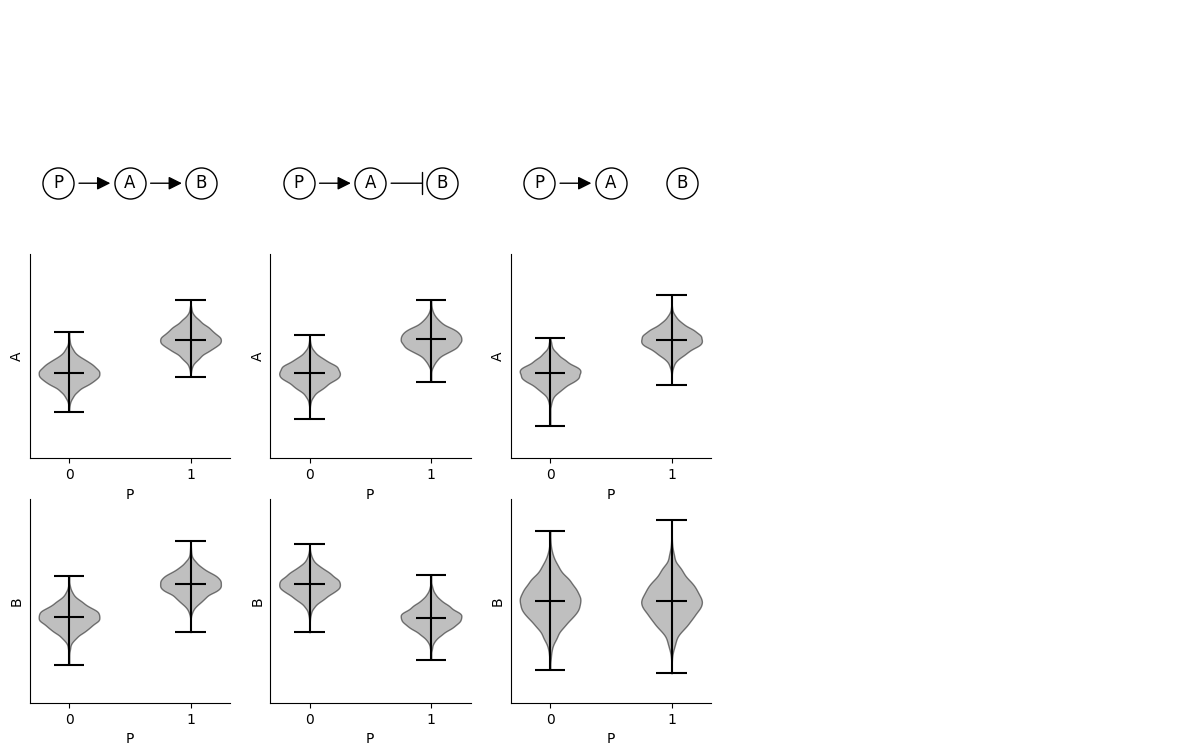

In [7]:
s='''
## The Good - Illustration with binary perturbation
'''
display(Markdown(s))
opts={'node_x':[0.5,1,0],'default_weight':3}
opts2={'node_x':[0.5,1,0.75,0],'node_y':[0,0,0.42,0],'default_weight':3}
nets=[('P->A->B',opts),('P->A-|B',opts),('P->A B',opts)]
fig,axes=draw_panel(nets,draw_data=[('P','A'),('P','B')],draw_distribution=False,discrete={'P':1},n_samples=10000)
plt.show()


## The Good - Group exercise
Form a group of 2-3 people. Each person choose 1-2 networks from the following. For each network:
1. Draw two schematic violin plots between P and A and between P and B
2. Convince your group members with your answers


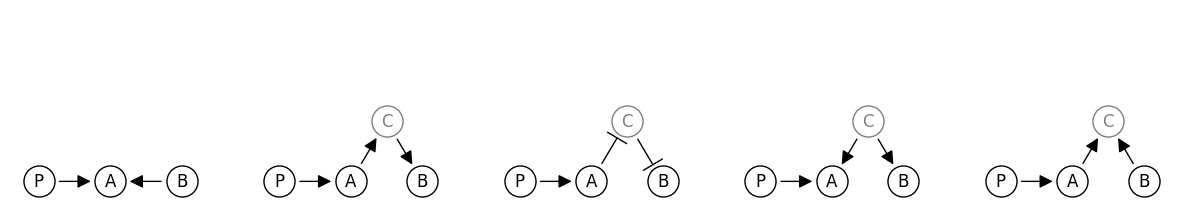


* Gray nodes: unmodelled or unobserved nodes (not needed in violin plot)
* '->' edges: positive regulation
* '-|' edges: negative regulation


In [ ]:
s='''
## The Good - Group exercise
Form a group of 2-3 people. Each person choose 1-2 networks from the following. For each network:
1. Draw two schematic violin plots between P and A and between P and B
2. Convince your group members with your answers
'''
display(Markdown(s))
nets=[('P->A<-B',opts),('P->A->c->B',opts2),('P->A-|c-|B',opts2),('P->A<-c->B',opts2),('P->A->c<-B',opts2)]
fig,axes=draw_panel(nets,draw_distribution=False)
plt.show()
s='''
* Gray nodes: unmodelled or unobserved nodes (not needed in violin plot)
* '->' edges: positive regulation/activation
* '-|' edges: negative regulation/repression
'''
display(Markdown(s))


## The Good - Solutions


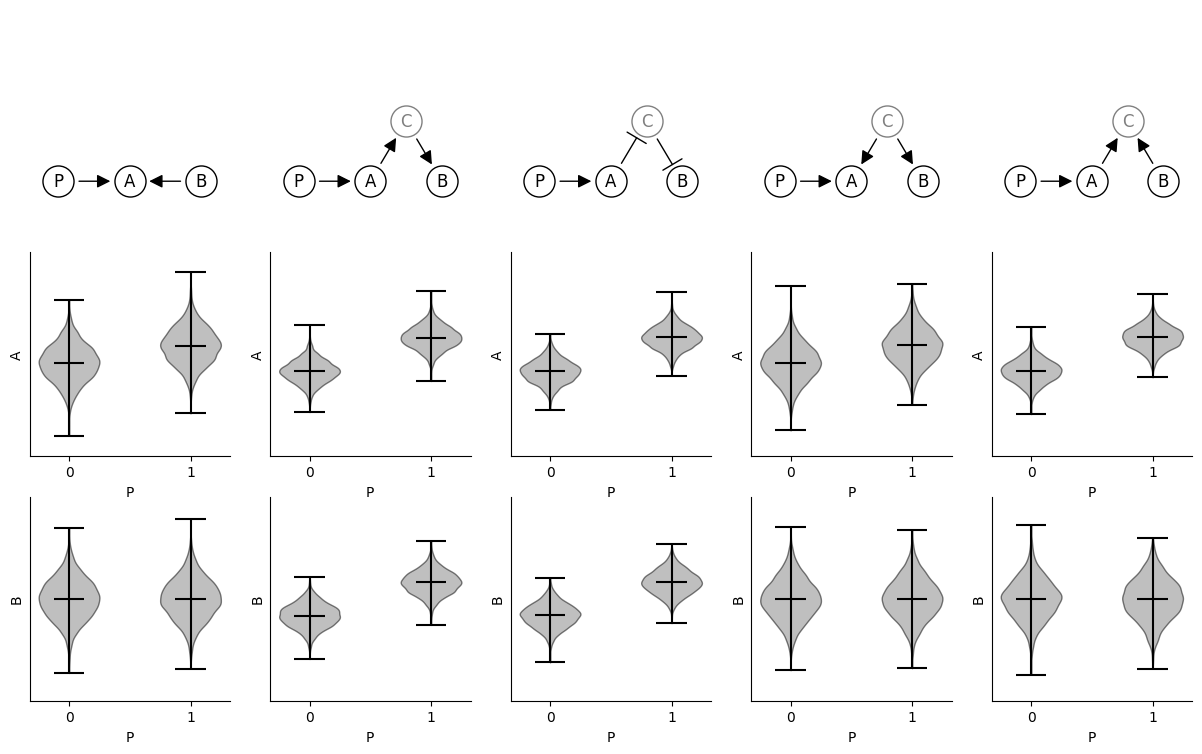

In [9]:
s='''
## The Good - Solutions
'''
display(Markdown(s))
nets=[('P->A<-B',opts),('P->A->c->B',opts2),('P->A-|c-|B',opts2),('P->A<-c->B',opts2),('P->A->c<-B',opts2)]
fig,axes=draw_panel(nets,draw_data=[('P','A'),('P','B')],draw_distribution=False,discrete={'P':1},n_samples=10000)
plt.show()


## The Good - Cases with differential expression


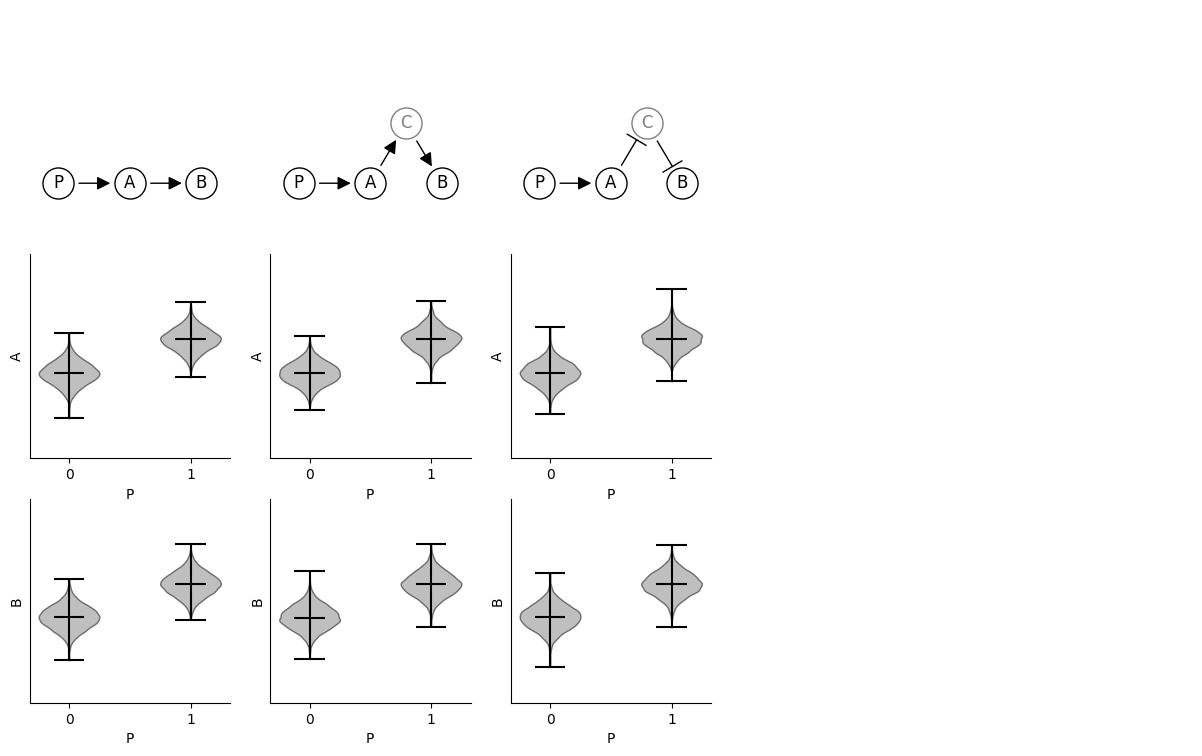

In [10]:
s='''
## The Good - Cases with differential expression
'''
display(Markdown(s))
nets=[('P->A->B',opts),('P->A->c->B',opts2),('P->A-|c-|B',opts2)]
fig,axes=draw_panel(nets,draw_data=[('P','A'),('P','B')],draw_distribution=False,discrete={'P':1},n_samples=10000)
plt.show()


## The Ugly - Cases with positive correlation and other challenges
* Problems solved/not solved


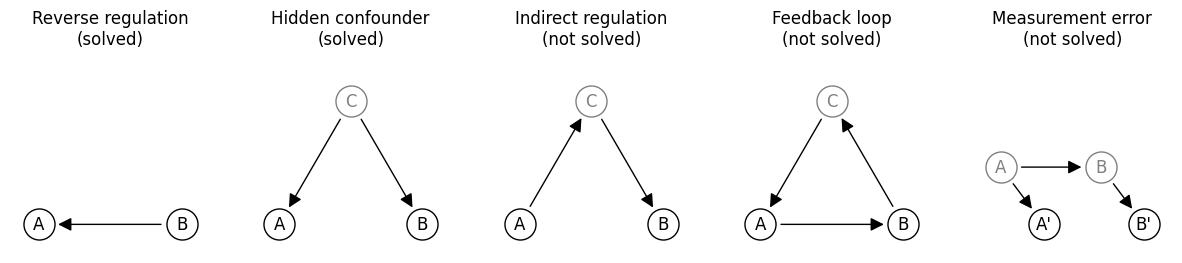


* Context specificity & scalability
* Biological mechanistic knowledge: direct or indirect, but how?
* Groundtruth availability: which method is best?
* Perfect perturbation availability


In [31]:
%run lib.py
from os import linesep
opts={'node_x':[0,1,0.5],'node_y':[0,0,0.86]}
nets=[('A<-B',{}),('A<-c->B',opts),('A->c->B',opts),('A->B->c c->A',opts),('A\'<-a->b->B\'',{'node_x':[0,0.3,0.7,1],'node_y':[0.4,0,0.4,0]})]

s='''
## The Ugly - Cases with positive correlation and other challenges
* Problems solved/not solved
'''
display(Markdown(s))
fig,axes=draw_panel(nets,draw_distribution=False)
axes[0][0].set_title('Reverse regulation'+linesep+'(solved)')
axes[0][1].set_title('Hidden confounder'+linesep+'(solved)')
axes[0][2].set_title('Indirect regulation'+linesep+'(not solved)')
axes[0][3].set_title('Feedback loop'+linesep+'(not solved)')
axes[0][4].set_title('Measurement error'+linesep+'(not solved)')
plt.show()

s='''
* Context specificity & scalability
* Biological mechanistic knowledge: direct or indirect, but how?
* Groundtruth availability: which method is best?
* Perfect perturbation availability
'''
display(Markdown(s))



## Practically how - Artificial Perturbations
| Molecular biology | High-throughput experiments |
| :----------------- | ----------------- |
| <img src="img/ko.jpg" width="200"  onerror="this.onerror=null; this.src='https://raw.githubusercontent.com/grnlab/courses/refs/heads/master/2025_BBS764/img/ko.jpg';"/> | <img src="https://www.researchgate.net/publication/374582962/figure/fig2/AS:11431281197301156@1696957288961/Perturb-seq-merges-a-pooled-CRISPR-screen-and-scRNA-sequencing-for-high-throughput.png" width="700"/> |
| Pros:<br><ul><li>Straightforward</li><li>Many assays</li><li>Gold standard</li></ul>| Pros:<br><ul><li>High throughput</li><li>Easy to scale up</li></ul><br><br>|
| Cons:<br><ul><li>Low throughput</li></ul><br> | Cons:<br><ul><li>Imperfect perturbations</li><li>Hard for primary cells</li></ul> |


## Practically how - Natural perturbations

    
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925443914001112-gr1_lrg.jpg" style="display: block; margin-left: auto; margin-right: auto;" width="360"/>

| Pros | Cons |
| :----------------- | :----------------- |
| <ul><li>Known as Mendelian randomization in GWAS</li><li>Better than on GWAS</li><li>Many primary cell types</li></ul> | <ul><li>Not so perfect perturbations</li><li>Costly</li></ul><br><br> |


## Gene regulatory network analysis
* Node level
  * Centrality measure e.g. TF activity
  * Gene modules
* Edge level
	* Gene regulation inference
  * Network rewiring
* System level
  * Cell identity, function, response, and fate determination
  * Perturbation outcome prediction: node and edge

## Opportunities
* Single cell multi-omics and spatial technologies
* Machine/Deep learning
* Biological knowledge
* Interventional applications